# Lesson 0030 - Bosch Feature Engineering Image Preprocessing
Up until now, we modelled data, and for this, we used data.<br>
Now we start a series of lessons, where we clean up or transform data.<br>
We start this series by doing some elementary operations on a wonderful picture by the artist [Hieronymus Bosch](https://en.wikipedia.org/wiki/Hieronymus_Bosch).<br>
We start by importing the [Image module](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html) from [PIL](https://pillow.readthedocs.io/en/stable/).

In [1]:
from PIL import Image

print( Image.__version__ )

5.4.1


Now, we import [requests](https://pypi.org/project/requests/), because we want to download the image in question from the web.

In [2]:
import requests

print( requests.__version__ )

2.21.0


Next, we import [BytesIO](https://docs.python.org/3/library/io.html) for dealing with what __requests__ will return.

In [3]:
from io import BytesIO

Finally, we import __numpy__ and __matplotlib__.

In [4]:
import numpy as np

print( np.__version__ )

1.16.2


In [5]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


Now we can actually download the image and print it.<br>
We employ [requests' get](https://2.python-requests.org/en/master/) to retrieve the image, we employ __BytesIO__ to deal with the data stream we get when retrieving the image, and finally, we open the object using __Image__.<br>
For plotting, we use [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html), and we manipulate the size and the ticks using code from [lesson 0010](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0010_mnist_classification_linear_classifier.ipynb).

([], <a list of 0 Text yticklabel objects>)

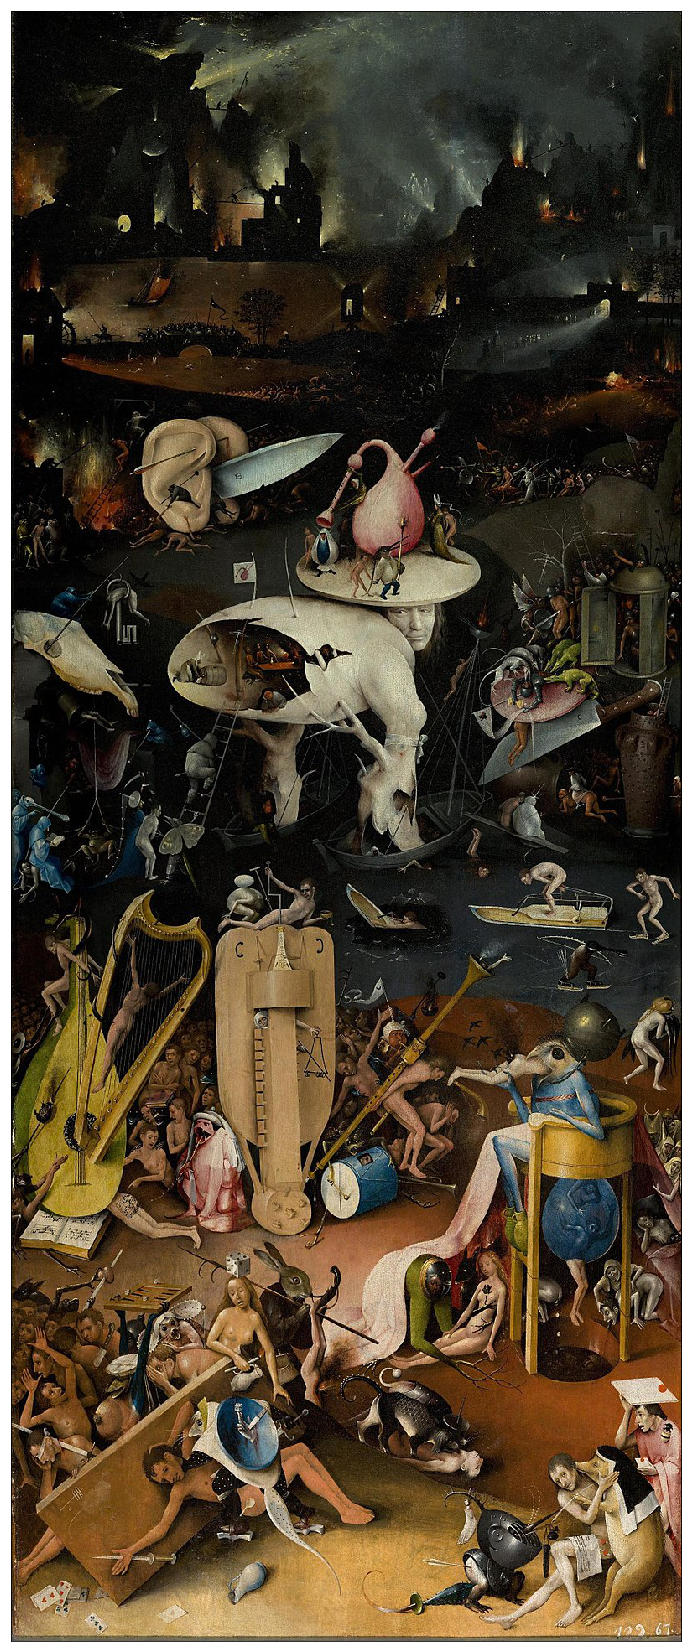

In [6]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Hieronymus_Bosch_-_The_Garden_of_Earthly_Delights_-_Hell.jpg/800px-Hieronymus_Bosch_-_The_Garden_of_Earthly_Delights_-_Hell.jpg"

response = requests.get( url )

img = Image.open( BytesIO( response.content ) )

plt.figure( figsize = ( 60, 30 ) )

plt.imshow( img )

plt.xticks( [] )

plt.yticks( [] )

Now, we check the dimensionality of the image object:

In [7]:
print( np.shape( img ) )

(1946, 800, 3)


So we got $3$ channels for red, green and blue and $1946 * 800$ pixels.<br>
We cut this image to $3$ channels and $1900 * 800$ pixels for further computations by dropping the last $46$ rows.<br>
For the cutted image, we use [numpy's zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) where we set the data type to __int32__. We retrieve the color values using [Image's getpixel](https://pillow.readthedocs.io/en/4.0.x/reference/Image.html). We force the returned values to be __int32__ using [numpy's datatypes converter](https://docs.scipy.org/doc/numpy/user/basics.types.html).

([], <a list of 0 Text yticklabel objects>)

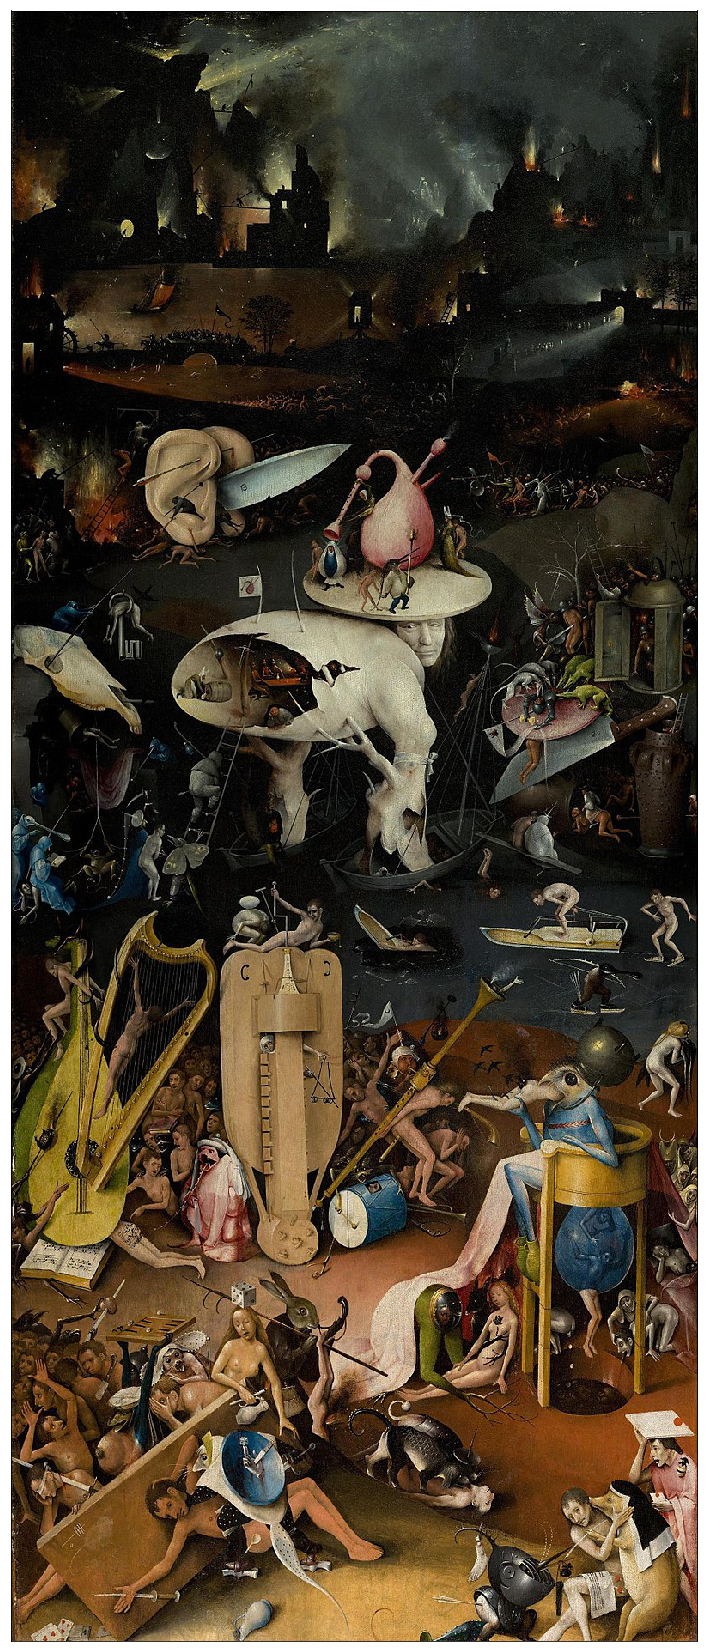

In [8]:
new_img = np.zeros( shape = [ 1900, 800, 3 ], dtype = 'int32' )


for i in range( 1900 ):
    
    for j in range( 800 ):
        
        pixel = img.getpixel( ( j, i ) )
        
        new_img[ i, j, 0 ] = np.int32( pixel[ 0 ] )
        
        new_img[ i, j, 1 ] = np.int32( pixel[ 1 ] )
        
        new_img[ i, j, 2 ] = np.int32( pixel[ 2 ] )
        
        
        
        
plt.figure( figsize = ( 60, 30 ) )

plt.imshow( new_img )

plt.xticks( [] )

plt.yticks( [] )

Now, we perform the first transformation: we map the image to grey.<br>
We use the formula from [John Cooks' website](https://www.johndcook.com/blog/2009/08/24/algorithms-convert-color-grayscale/) for this.<br>
For plotting, we employ the colormap [Greys](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

([], <a list of 0 Text yticklabel objects>)

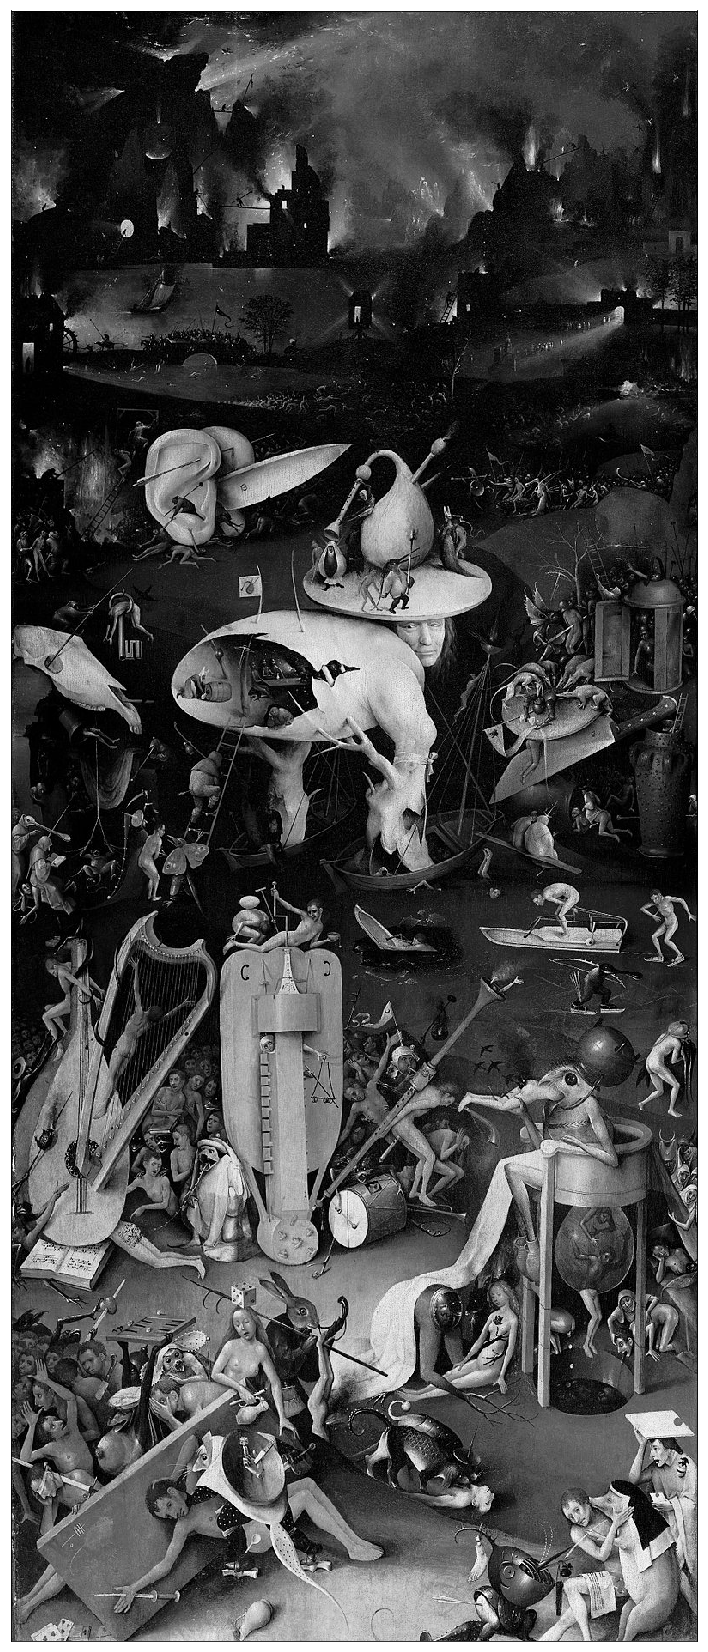

In [9]:
grey = np.zeros( shape = [ 1900, 800 ] )



for i in range( 1900 ):
    
    for j in range( 800 ):
        
        grey[ i, j ] = 0.21 * ( 255 - new_img[ i, j, 0 ] ) + 0.72 * ( 255 - new_img[ i, j, 1 ] ) +\
        0.07 * ( 255 - new_img[ i, j, 2 ] )
        
        
        
        
plt.figure( figsize = ( 60, 30 ) )

plt.imshow( grey, cmap = "Greys" )

plt.xticks( [] )

plt.yticks( [] )

In [lesson 0018](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0018_mnist_classification_convolutional_neural_network.ipynb), we introduced __Max Pooling__, and now we show, why __Max Pooling__ is so powerful: we cover the grey image with a grid of $5*5$ squares, and in each square, we select the maximum value.

([], <a list of 0 Text yticklabel objects>)

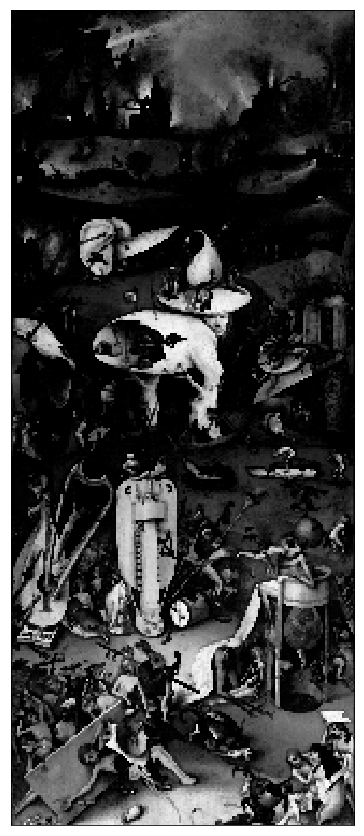

In [10]:
max_pool = np.zeros( shape = [ 380, 160 ] )




for i in range( 380 ):
    
    for j in range( 160 ):
        
        left = j * 5
        
        right = left + 5
        
        up = i * 5
        
        down = up + 5
        
        part = grey[ up : down, left : right ]
        
        max_pool[ i, j ] = np.max( part )
        
        
        
        
plt.figure( figsize = ( 30, 15 ) )

plt.imshow( max_pool, cmap = "Greys" )

plt.xticks( [] )

plt.yticks( [] )

We notice a significant loss in the image, but considering, that we ignored $96\%$ of the pixels, the resulting image looks great.<br>
Now we want to detect edges.<br>
But what is an edge? Consider the screen, you are looking at right now. You notice, that along the edge of the screen the color changes. Mathematically, this corresponds to a jump in the derivative of the implicit function, that renders the colors. Therefore, computing __derivatives__ might help us finding edges.<br>
The simplest scheme to compute derivatives is to subtract neighbouring rows or columns from each other.<br>
We start by subtracting neighbouring rows:

([], <a list of 0 Text yticklabel objects>)

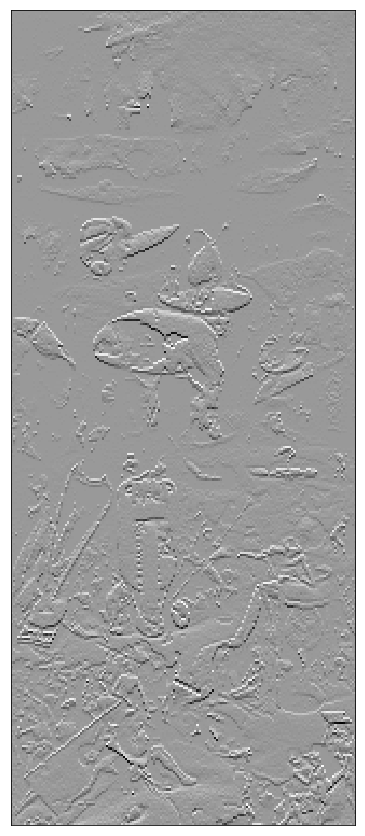

In [11]:
first_derivative_difference_rows = np.zeros( shape = [ 379, 160 ] )




for i in range( 379 ):
    
    first_derivative_difference_rows[ i, : ] = max_pool[ i + 1, : ] - max_pool[ i, : ]
    
    
    
plt.figure( figsize = ( 30, 15 ) )

plt.imshow( first_derivative_difference_rows, cmap = "Greys" )

plt.xticks( [] )

plt.yticks( [] )

We see, that nearly all the information is lost, but the edges are still maintained.<br>
Let's try subtracting the columns:

([], <a list of 0 Text yticklabel objects>)

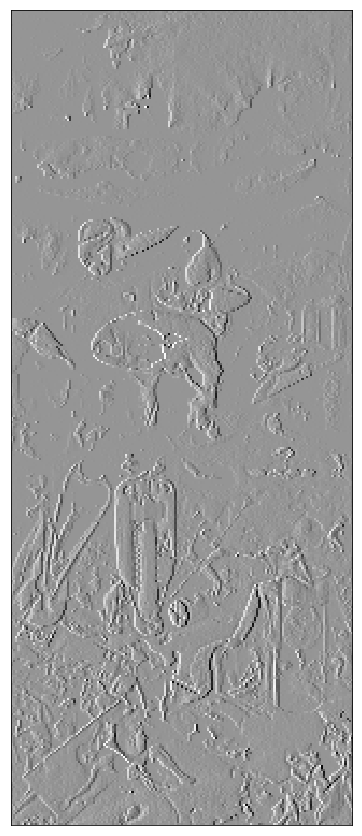

In [12]:
first_derivative_difference_columns = np.zeros( shape = [ 380, 159 ] )




for i in range( 159 ):
    
    first_derivative_difference_columns[ :, i ] = max_pool[ :, i + 1 ] - max_pool[ :, i ]
    
    
    
plt.figure( figsize = ( 30, 15 ) )

plt.imshow( first_derivative_difference_columns, cmap = "Greys" )

plt.xticks( [] )

plt.yticks( [] )

Here, we seem to have maintained more information.<br>
Let's try the [second order Finite Difference scheme](https://en.wikipedia.org/wiki/Finite_difference) for the columns:

([], <a list of 0 Text yticklabel objects>)

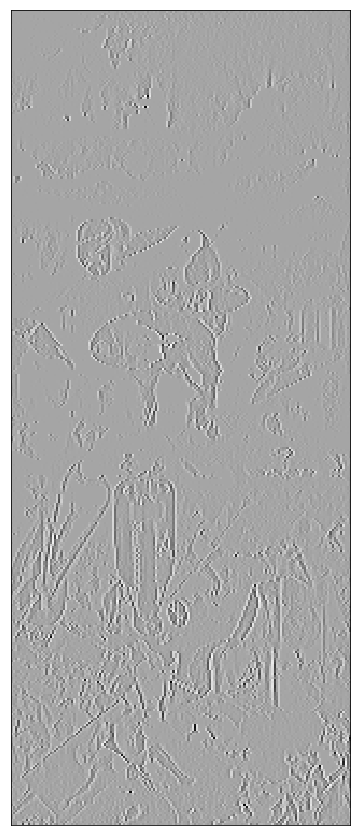

In [13]:
first_derivative_difference_columns_2nd_order = np.zeros( shape = [ 380, 158 ] )




for i in range( 158 ):
    
    first_derivative_difference_columns_2nd_order[ :, i ] = max_pool[ :, i ] + max_pool[ :, i + 2 ] - \
    2 * max_pool[ :, i + 1 ]
    
    
    
plt.figure( figsize = ( 30, 15 ) )

plt.imshow( first_derivative_difference_columns_2nd_order, cmap = "Greys" )

plt.xticks( [] )

plt.yticks( [] )

Here, the edges seem a little washed out.<br>
Let's try the second order Finite Difference scheme for the rows:

([], <a list of 0 Text yticklabel objects>)

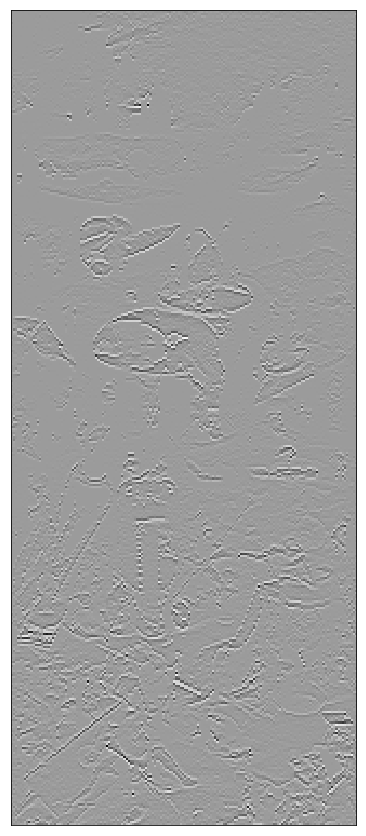

In [14]:
first_derivative_difference_rows_2nd_order = np.zeros( shape = [ 378, 160 ] )




for i in range( 378 ):
    
    first_derivative_difference_rows_2nd_order[ i, : ] = max_pool[ i + 2, : ] + max_pool[ i, : ] -\
    2 * max_pool[ i + 1, : ]
    
    
    
plt.figure( figsize = ( 30, 15 ) )

plt.imshow( first_derivative_difference_rows_2nd_order, cmap = "Greys" )

plt.xticks( [] )

plt.yticks( [] )

So we learnt, that we can reduce an image by __Max Pooling__ without losing too much information, and that we can amplify edges by subtracting rows and columns. We might employ this in a self driving car, where we sample down an image using __Max Pooling__ and then amplify the edges.<br>
Class dismissed.